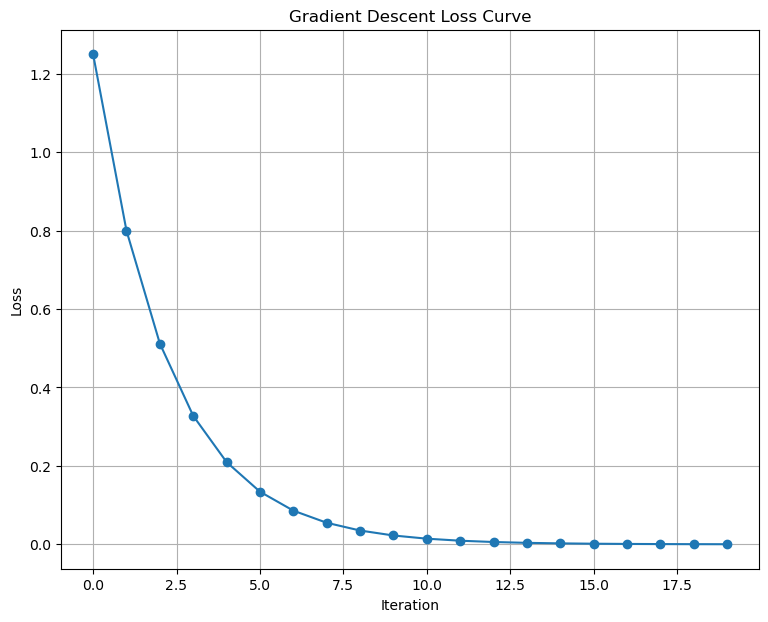

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义简单的二元函数
def f(x, y):
    return x**2 + y**2

learning_rate = 0.1
num_iterations = 20

x0 = -1.0
y0 = -0.5

# 记录函数值和路径
loss_values = []
x_values = [x0]
y_values = [y0]

# 执行梯度下降
x = torch.tensor(x0, requires_grad=True)
y = torch.tensor(y0, requires_grad=True)
for i in range(num_iterations):
    loss = f(x, y)
    loss_values.append(loss.item())
    loss.backward()
    with torch.no_grad():
        x -= learning_rate * x.grad
        y -= learning_rate * y.grad
        x.grad.zero_()
        y.grad.zero_()
x_values.append(x.item())
y_values.append(y.item())

# 绘制损失曲线
plt.figure(figsize=(9, 7))
plt.plot(loss_values, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Gradient Descent Loss Curve')
plt.grid()
plt.show()

# 绘制函数曲面和梯度下降路径
x = np.linspace(-4, 4, 36) 
y = np.linspace(-8, 4, 36) 
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

fig = plt.figure(figsize=(11, 9))
ax = fig.add_subplot(111, projection='3d')

# 绘制函数曲面
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6, edgecolor='none')

# 绘制梯度下降路径
path_z = [f(x_val, y_val) for x_val, y_val in zip(x_values, y_values)]
ax.scatter(x_values, y_values, path_z, color='r', label='Gradient Descent Path')
for i in range(1, len(x_values), 2): 
    x1, y1, z1 = x_values[i-1], y_values[i-1], path_z[i-1]
    x2, y2, z2 = x_values[i], y_values[i], path_z[i]
    ax.quiver(x1, y1, z1, x2-x1, y2-y1, z2-z1, color='b', arrow_length_ratio=0.1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Gradient Descent Visualization')
ax.legend()

plt.show()